In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
# Import the log file
df = pd.read_csv("log3.csv")
# LabelEncoder for the diffMethod
enc = LabelEncoder()
enc.fit(df["diffMethod"])
df["diffMethod"] = enc.transform(df["diffMethod"])
# Add the f1_score
df["f1_score"] = 1/(1/df["percentHeliTotalFiltered"]+1/df["percentFrameWithHeli"])

# Display
df.tail()

,gaussWindow,mgp,minArea,diffMethod,winSize,maxLevel,realFps,avNbBoxes,avNbFilteredBoxes,avNbHeliBox,percentHeliTotalFiltered,percentFrameWithHeli,f1_score
535,7,100,1,0,3,4,103.720102,4.733042,0.991977,0.376368,0.379412,0.300582,0.167714
536,5,100,16,0,7,4,114.721364,7.786287,3.342086,0.708242,0.211916,0.540029,0.152193
537,7,100,4,0,5,7,106.600304,3.495259,0.924143,0.390956,0.423047,0.310044,0.178918
538,7,125,16,0,5,7,104.965775,3.485777,0.940190,0.400438,0.425912,0.315866,0.181363
539,5,125,9,0,5,4,113.011014,7.428155,3.369074,0.697301,0.206971,0.529840,0.148833


[0, 1, 0, 1]

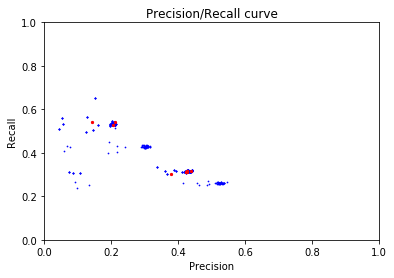

In [3]:
nSim = len(df)-10 # Show where the last 10 values have been found
plt.figure()
plt.scatter(df["percentHeliTotalFiltered"][:nSim], df["percentFrameWithHeli"][:nSim], s=0.5, c='blue')
plt.scatter(df["percentHeliTotalFiltered"][nSim:], df["percentFrameWithHeli"][nSim:], s=5, c='red')
plt.title("Precision/Recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.axis([0, 1, 0, 1])

In [4]:
def plotParam(param, paramRange):
    plt.figure(figsize=(25, 15))
    colors = ['blue', 'purple', 'yellow', 'orange', 'red']
    cmap = matplotlib.cm.get_cmap("jet")
    for index, value in enumerate(paramRange):
        indexes = (df[param] == value)
        prec = df["percentHeliTotalFiltered"][indexes]
        recall = df["percentFrameWithHeli"][indexes]
        plt.scatter(prec, recall, c=cmap(value/max(paramRange)))
        i = np.random.randint(len(prec))
        plt.text(prec.iloc[i], recall.iloc[i], str(value), color=cmap(value/max(paramRange)), fontdict={"weight": "bold", "size": 30})
        plt.title(param+" impact", fontdict={"weight": "bold", "size": 30})
    plt.xlabel("Precision", fontdict={"weight": "bold", "size": 20})
    plt.ylabel("Recall", fontdict={"weight": "bold", "size": 20})
    plt.axis([0, 1, 0, 1])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

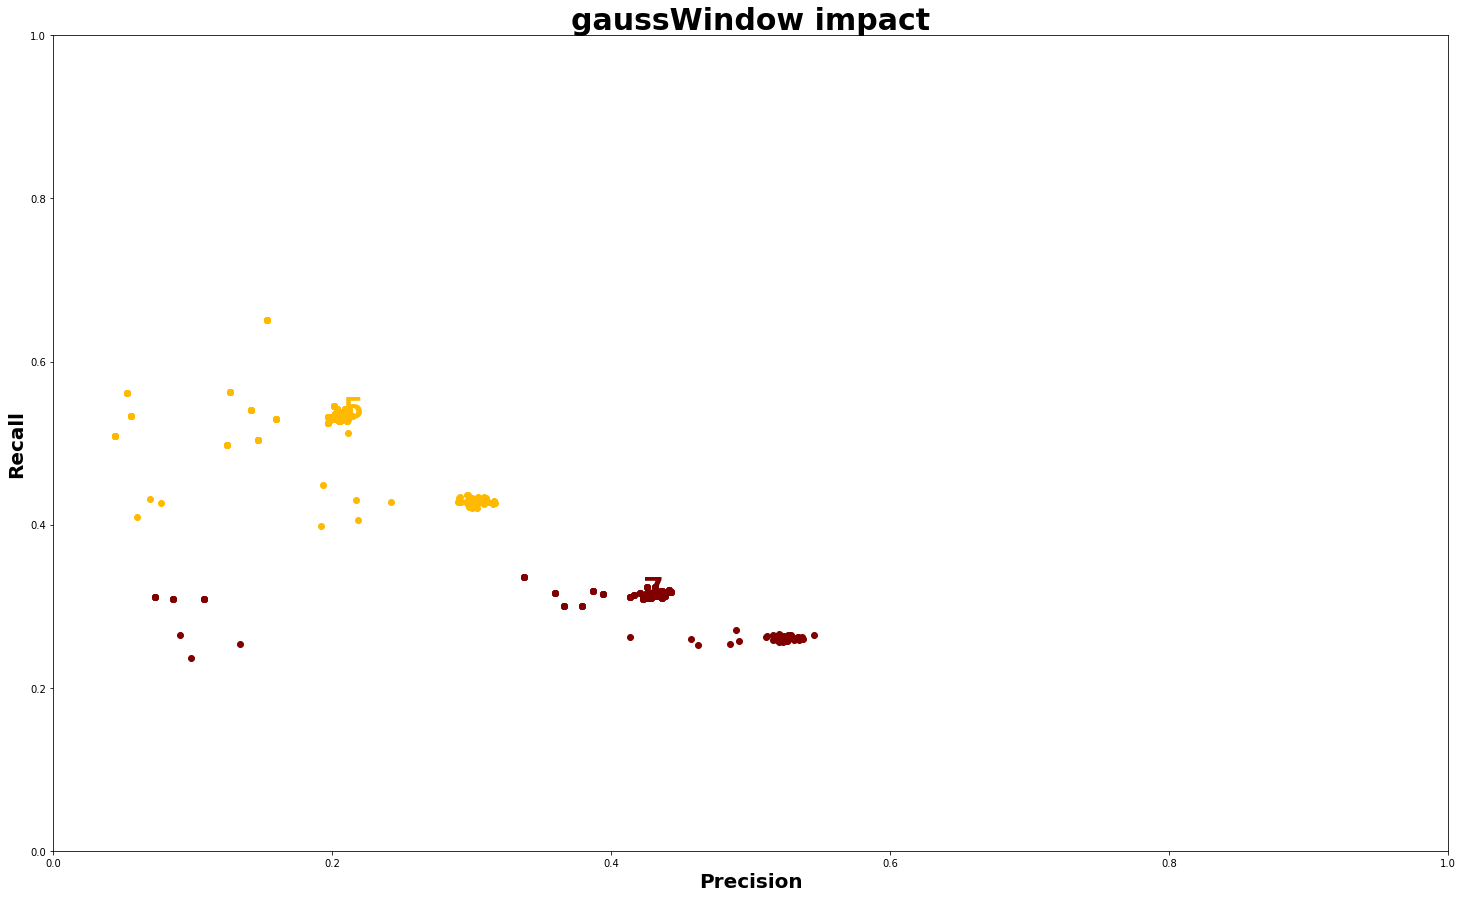

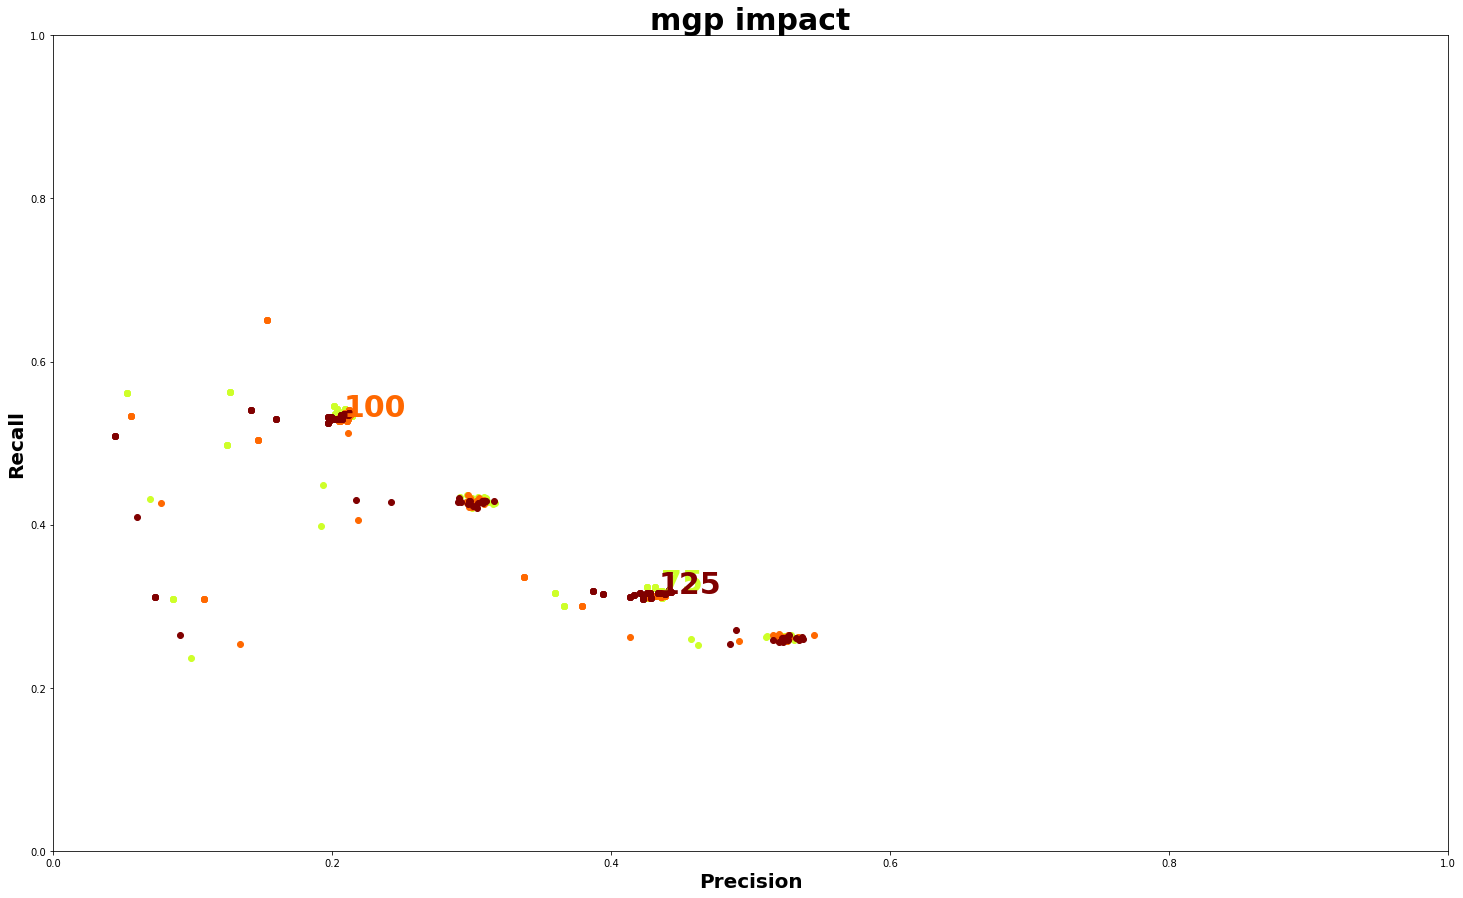

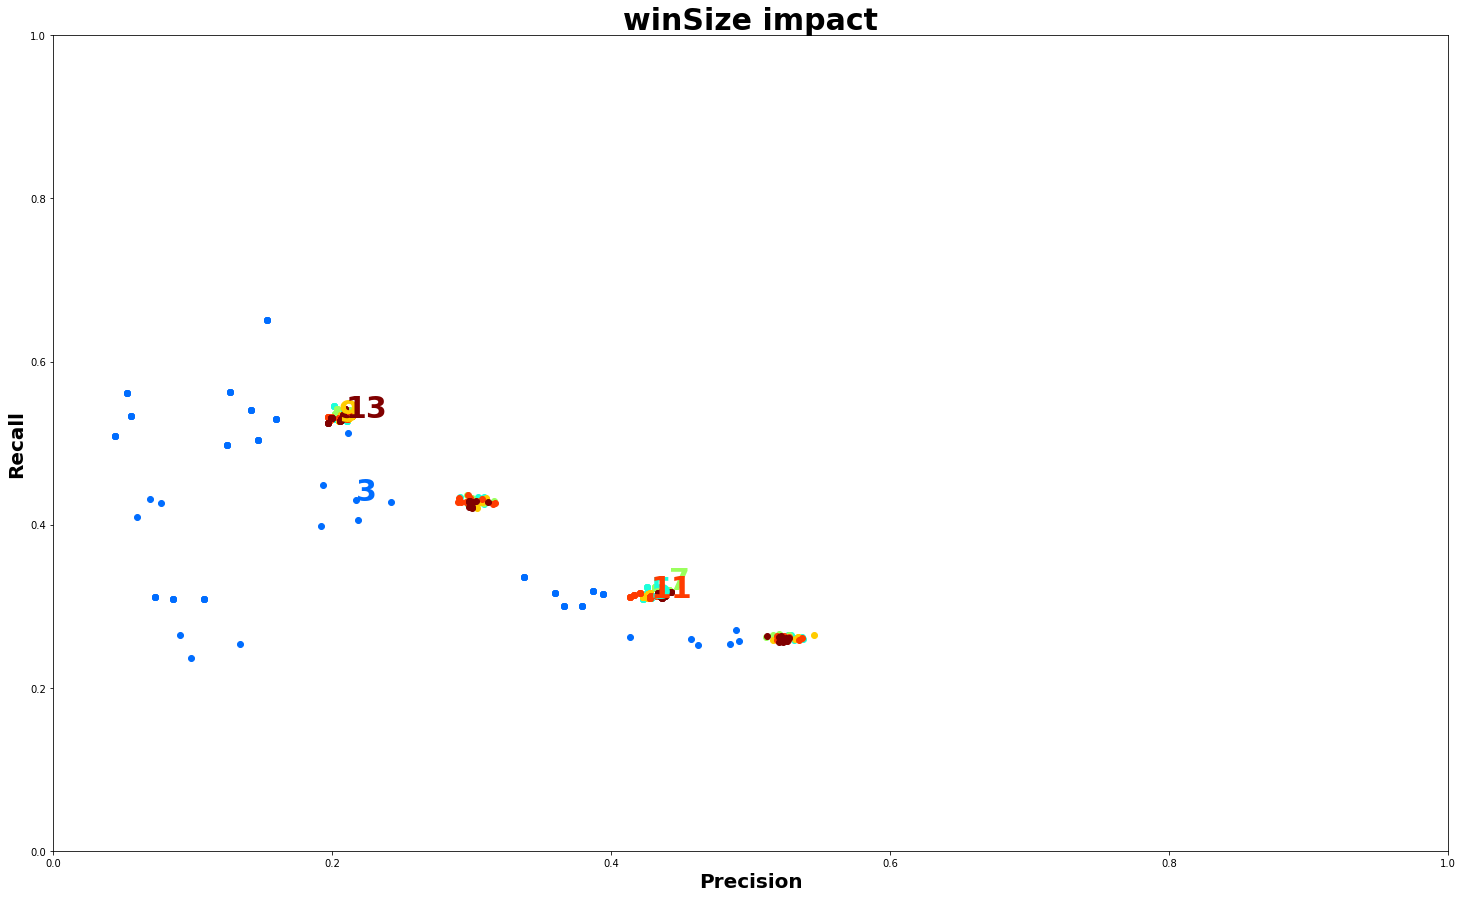

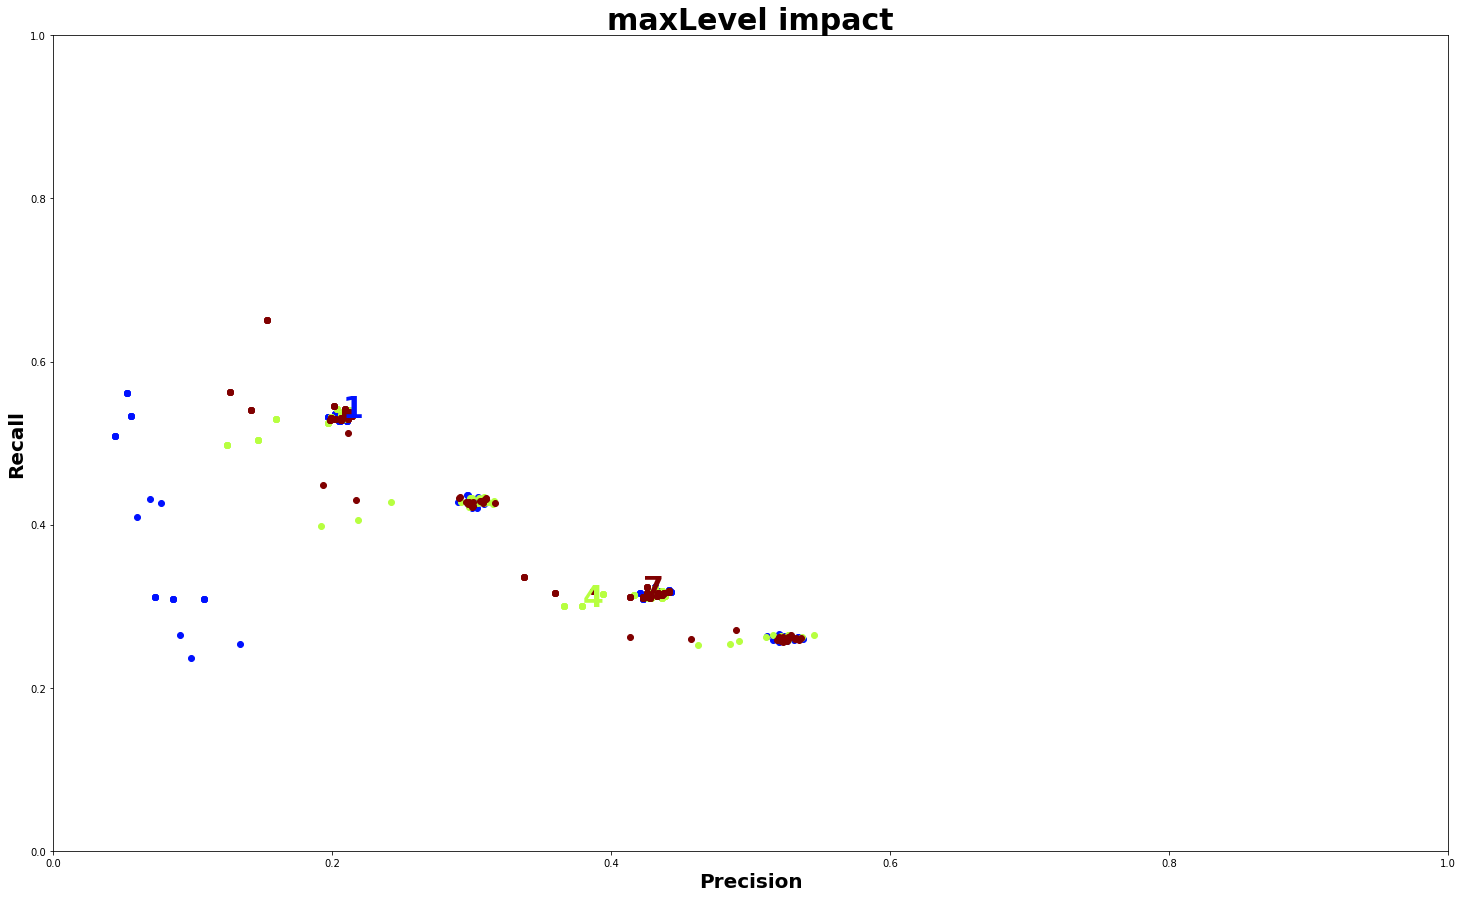

In [5]:
param = ["gaussWindow", "mgp", "winSize", "maxLevel"]
paramRange = [range(5, 8, 2), range (75, 126, 25), range(3, 14, 2), range(1, 8, 3)]
for i in range(len(param)):
    plotParam(param[i], paramRange[i])

In [6]:
# Max f1_score
df[df["f1_score"] == max(df["f1_score"])]

,gaussWindow,mgp,minArea,diffMethod,winSize,maxLevel,realFps,avNbBoxes,avNbFilteredBoxes,avNbHeliBox,percentHeliTotalFiltered,percentFrameWithHeli,f1_score
97,7,125,9,0,7,1,116.438290,3.89132,0.919037,0.405543,0.44127,0.320233,0.185566
304,7,125,16,0,7,1,114.024830,3.89132,0.919037,0.405543,0.44127,0.320233,0.185566
309,7,125,1,0,7,1,108.091549,3.89132,0.919037,0.405543,0.44127,0.320233,0.185566
340,7,125,4,0,7,1,113.840626,3.89132,0.919037,0.405543,0.44127,0.320233,0.185566


In [7]:
# Max precision
df[df["percentHeliTotalFiltered"] == max(df["percentHeliTotalFiltered"])]

,gaussWindow,mgp,minArea,diffMethod,winSize,maxLevel,realFps,avNbBoxes,avNbFilteredBoxes,avNbHeliBox,percentHeliTotalFiltered,percentFrameWithHeli,f1_score
427,7,100,25,0,9,4,103.113564,4.099198,0.606127,0.330416,0.545126,0.26492,0.17828


In [8]:
# Max recall
df[df["percentFrameWithHeli"] == max(df["percentFrameWithHeli"])]

,gaussWindow,mgp,minArea,diffMethod,winSize,maxLevel,realFps,avNbBoxes,avNbFilteredBoxes,avNbHeliBox,percentHeliTotalFiltered,percentFrameWithHeli,f1_score
19,5,100,9,0,3,7,114.306574,9.974471,5.66229,0.86725,0.153162,0.651383,0.124005
313,5,100,16,0,3,7,114.674669,9.974471,5.66229,0.86725,0.153162,0.651383,0.124005
426,5,100,4,0,3,7,104.989147,9.974471,5.66229,0.86725,0.153162,0.651383,0.124005
529,5,100,1,0,3,7,113.121622,9.974471,5.66229,0.86725,0.153162,0.651383,0.124005


Text(0, 0.5, 'F1 - score')

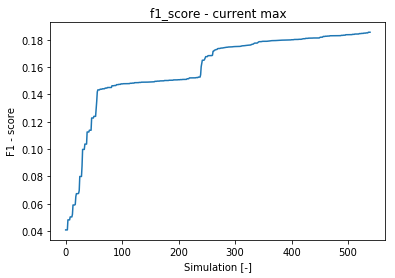

In [9]:
plt.figure()
plt.plot(sorted(df["f1_score"]))
plt.title("f1_score - current max")
plt.xlabel("Simulation [-]")
plt.ylabel("F1 - score")